This notebook will create some synthesised calls and check how well the ```measure_horseshoe_bat_calls``` package can replicate the original parameters. 

-- Thejasvi Beleyur 2020-02-17

In [1]:
import sys 
sys.path.append('../measure_horseshoe_bat_calls/')
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from measure_horseshoe_bat_calls import measure_a_horseshoe_bat_call 
from measure_a_horseshoe_bat_call import make_one_CFcall, measure_hbc_call, make_overview_figure
from measure_a_horseshoe_bat_call import get_peak_frequency, remove_frequency

In [2]:
%matplotlib notebook

In [3]:
cf_duration = np.arange(0.05, 0.08,0.01)
fm_duration = np.arange(0.001, 0.006, 0.001)
peak_frequency = np.arange(90000, 120000, 10000)
fm_bandw = np.arange(15000, 25000, 1000)

In [4]:
all_parameter_combinations = np.array(np.meshgrid(cf_duration, fm_duration, peak_frequency, fm_bandw)).T.reshape(-1,4)
synthetic_calls = pd.DataFrame(all_parameter_combinations)
synthetic_calls.columns = ['cf_duration','fm_duration','peak_frequency','fm_bandw']
synthetic_calls['call_durn'] = synthetic_calls['cf_duration'] + synthetic_calls['fm_duration']
synthetic_calls.head()

,cf_duration,fm_duration,peak_frequency,fm_bandw,call_durn
0,0.05,0.001,90000.0,15000.0,0.051
1,0.05,0.002,90000.0,15000.0,0.052
2,0.05,0.003,90000.0,15000.0,0.053
3,0.05,0.004,90000.0,15000.0,0.054
4,0.05,0.005,90000.0,15000.0,0.055


In [5]:
multiparameter_calls = {}

In [6]:
fs = 250000
for i, call_parameter in synthetic_calls.iloc[:20,:].iterrows():
    cf_durn, fm_durn, peak_f, fm_bw, _ = call_parameter
    only_call =  make_one_CFcall(cf_durn+fm_durn, fm_durn, cf_freq=peak_f, fs=fs,
                                                           call_shape='staplepin',
                                                           fm_bandwidth=fm_bw)
    gap = 250
    call_w_noise = np.random.normal(0,10**-60/20,only_call.size+gap*2)
    call_w_noise[gap:-gap] += only_call
    multiparameter_calls[tuple(call_parameter.tolist())] = call_w_noise
    

../measure_horseshoe_bat_calls/measure_a_horseshoe_bat_call.py:204: RankWarning: Polyfit may be poorly conditioned
  p = np.polyfit(t, freqs, polynomial_num)
../measure_horseshoe_bat_calls/measure_a_horseshoe_bat_call.py:204: RankWarning: Polyfit may be poorly conditioned
  p = np.polyfit(t, freqs, polynomial_num)
../measure_horseshoe_bat_calls/measure_a_horseshoe_bat_call.py:204: RankWarning: Polyfit may be poorly conditioned
  p = np.polyfit(t, freqs, polynomial_num)
../measure_horseshoe_bat_calls/measure_a_horseshoe_bat_call.py:204: RankWarning: Polyfit may be poorly conditioned
  p = np.polyfit(t, freqs, polynomial_num)
../measure_horseshoe_bat_calls/measure_a_horseshoe_bat_call.py:204: RankWarning: Polyfit may be poorly conditioned
  p = np.polyfit(t, freqs, polynomial_num)
../measure_horseshoe_bat_calls/measure_a_horseshoe_bat_call.py:204: RankWarning: Polyfit may be poorly conditioned
  p = np.polyfit(t, freqs, polynomial_num)
../measure_horseshoe_bat_calls/measure_a_horseshoe_b

In [7]:
index = 5
params = multiparameter_calls.items()[index][0]
print(params)
call = multiparameter_calls.items()[index][1]
sounds, msmts = measure_hbc_call(call,fs=fs)

(0.05, 0.003, 90000.0, 15000.0, 0.053000000000000005)


<IPython.core.display.Javascript object>


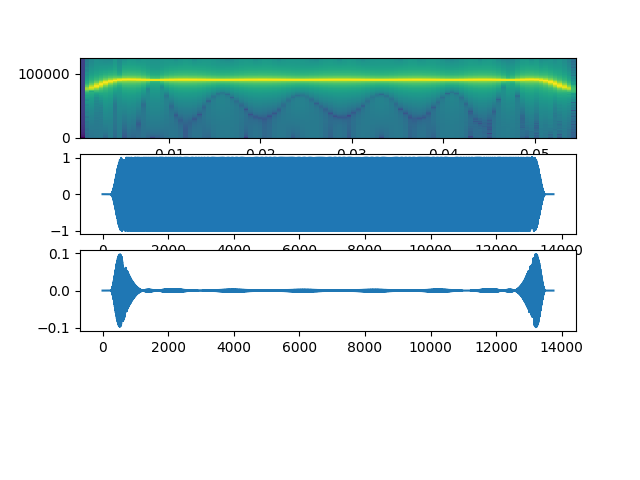

In [8]:
plt.figure()
plt.subplot(411)
plt.specgram(call, Fs=fs)
plt.subplot(412)
plt.plot(call)
plt.subplot(413)
peak_f = get_peak_frequency(call)
wo_peak = remove_frequency(call, peak_f, fs=fs)
plt.plot(wo_peak)


In [11]:
help(make_overview_figure)

Help on function make_overview_figure in module measure_a_horseshoe_bat_call:

make_overview_figure(audio, sounds, msmts, **kwargs)



<IPython.core.display.Javascript object>


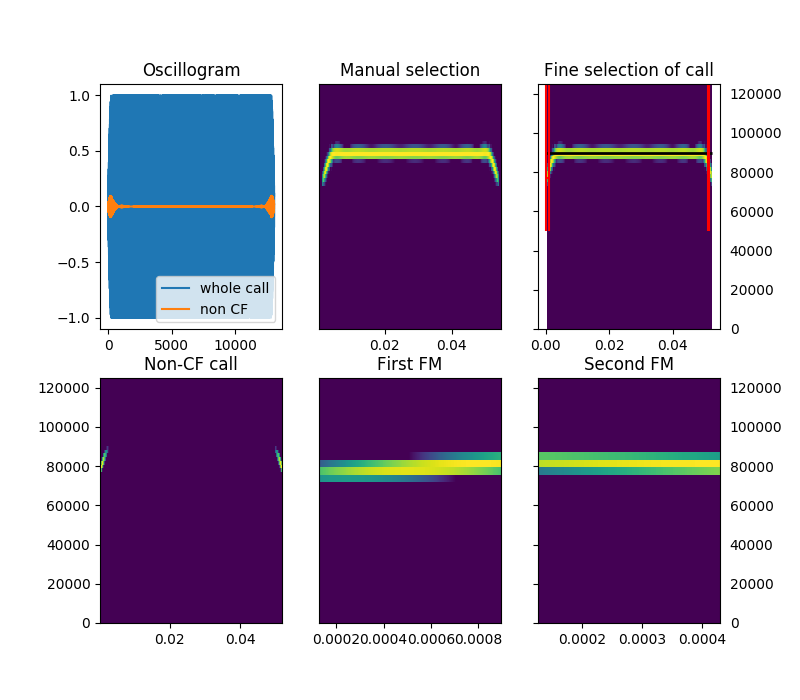

In [17]:
make_overview_figure(call, sounds, msmts, fs=250000)

In [18]:
msmts[['call_duration','upfm_duration','downfm_duration','peak_frequency',
       'upfm_terminal_frequency','downfm_terminal_frequency','cf_duration']]

,call_duration,upfm_duration,downfm_duration,peak_frequency,upfm_terminal_frequency,downfm_terminal_frequency,cf_duration
0,0.052244,0.001024,0.000556,89843.75,77148.4375,79136.690647,0.050664


In [10]:
multiparameter_calls.items()[index][0]

(0.05, 0.003, 90000.0, 15000.0, 0.053000000000000005)

### Comment:
At least right now I can see that the CF part of the call is being picked up relatively accurately (peak CF and duration) -- but the FM durations are not being picked up well at all. They are constantly being under-estimated. I guess this is where the peak-CF amplification and energy profile calculations may be more useful. 